In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
x = np.linspace(1, 10, 100)
y = x * np.exp(-x / 20)

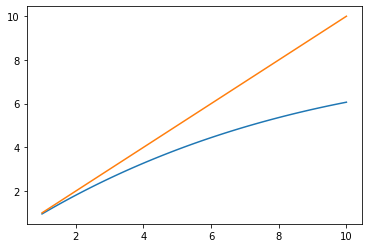

In [56]:
plt.plot(x, y)
plt.plot(x, x)

In [57]:
import json

In [133]:
with open("meta.json", "r") as f:
    meta = json.load(f)

In [134]:
meta = sorted(meta, key=lambda x: x["time"])[1:]

In [135]:
meta_dict = {}
for item in meta:
    name = item["name"]
    raw_name = name[:name.rfind("]")+1]
    state = name[len(raw_name):]
    if raw_name not in meta_dict:
        meta_dict[raw_name] = {}
        
    meta_dict[raw_name][state] = item["time"]

In [136]:
import matplotlib.colors as mcolors
colors=list(mcolors.TABLEAU_COLORS.keys())

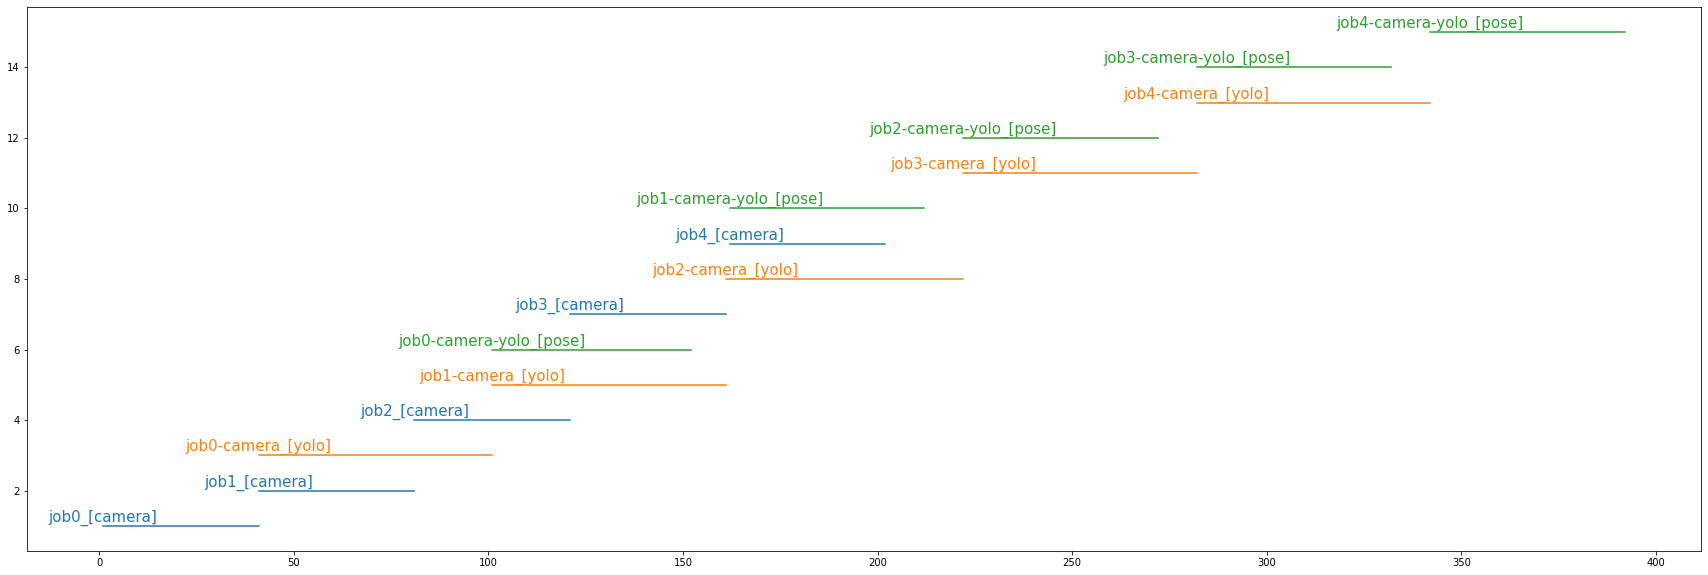

In [137]:
plt.figure(figsize=(30, 10))
class_table = {}
for index, (k, v) in enumerate(meta_dict.items()):
    
    y = index + 1
    x0 = v["begin"]
    x1 = v["end"]
    
    kname = k[k.find("[")+1:k.find("]")]
    if kname not in class_table:
        class_table[kname] = len(class_table)
    
    idd = class_table[kname]
    color = mcolors.TABLEAU_COLORS[colors[idd % len(colors)]]
    plt.text(x0, y, k, ha='center', va= 'bottom',fontsize=15, color=color)
    plt.plot([x0, x1], [y, y], "-", color=color)

plt.savefig("time.jpg")